## COMP431 Midterm



## FATMA GÜÇLÜ 
110110082
-- If you want to check normalized points, please uncomment that parts in the code.
-- I use points "pts2d-pic_a.txt" and "pts3d.txt" for Q2-a
-- I use points "pts2d-pic_b.txt" and "pts3d.txt" for Q2-b-c


## QUESTION1



d value:  -138 , theta value:  133 for scaled edge points

Equations of the sinusoids with a scale 100 :
d1 = 100*cost[theta] + 10sint[theta]
d2 = 50*cost[theta] + 51sint[theta]
d3 = 81*cost[theta] + 79sint[theta]


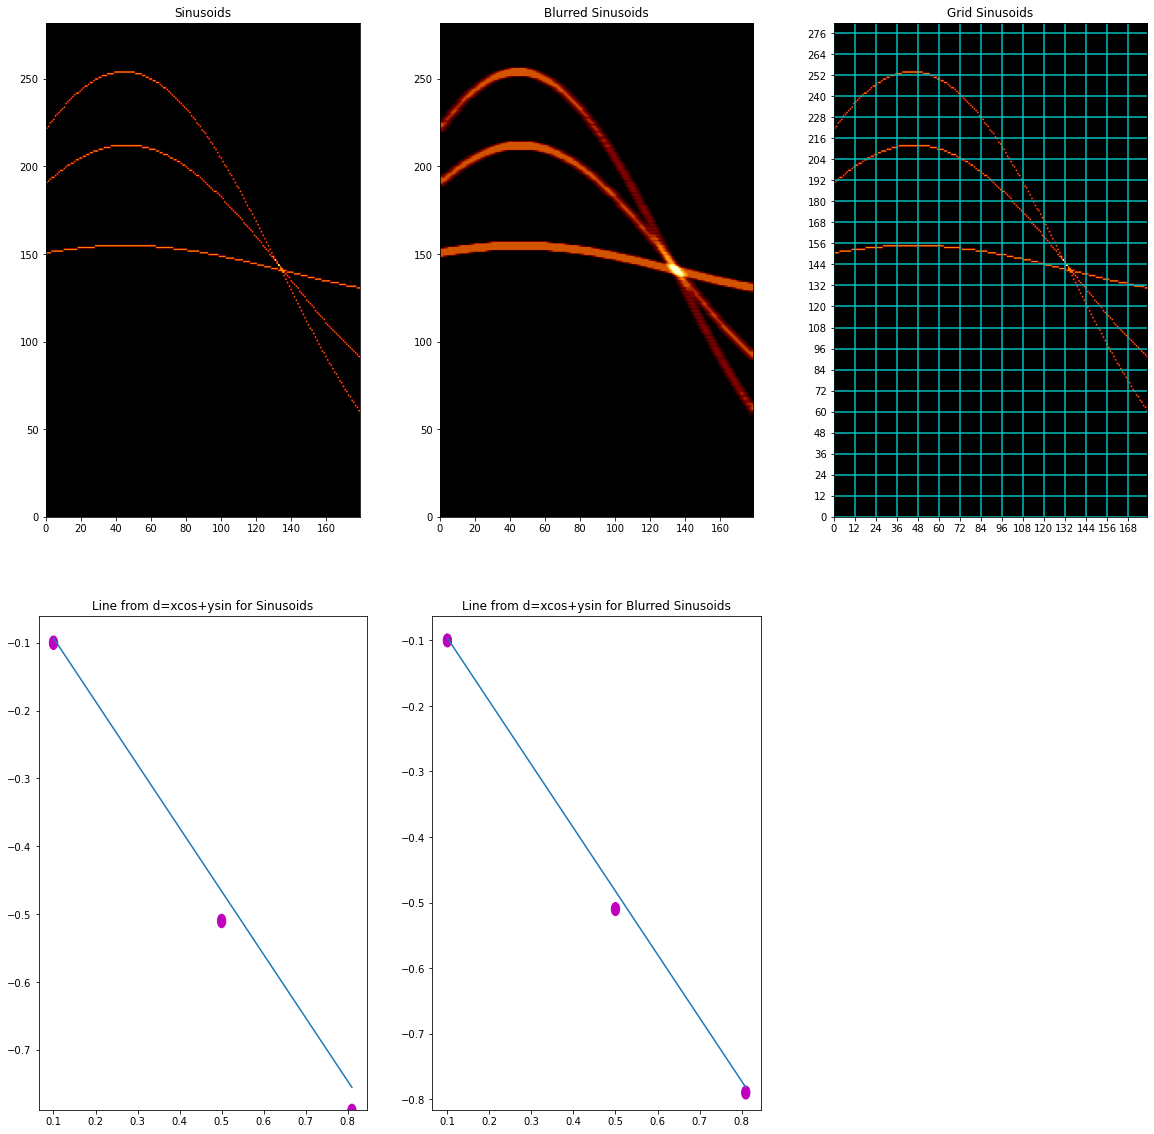

In [79]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import skimage
import math

# These are the three edge poins with scale 100 to observe results better
x1=0.1*100
y1=0.1*100

x2=0.5*100
y2=0.51*100

x3=0.81*100
y3=0.79*100

# I use the theta range from 0-180, so my d value negative
theta = np.deg2rad(np.arange(0.0,180.0))
cost = np.cos(theta)
sint = np.sin(theta)

# I assume 100x100 image then find max diagonal distance
diagonal = int(np.sqrt(100*100+100*100)*2)

accum = np.zeros((diagonal,180))
for time in range(len(theta)):   
    d1 = round(x1*cost[time] + y1*sint[time])+diagonal//(-2)
    d2 = round(x2*cost[time] + y2*sint[time])+diagonal//(-2)
    d3 = round(x3*cost[time] + y3*sint[time])+diagonal//(-2)
    accum[-d1,time] +=1
    accum[-d2,time] +=1
    accum[-d3,time] +=1
    
d = np.linspace(0, diagonal, diagonal*2)
# Plot of sinusoid
fig = plt.figure(figsize=(20, 20))
first_image = fig.add_subplot(2, 3, 1)
sinusoids = plt.imshow(accum, cmap='afmhot', extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[0], d[-1]])
first_image.set_title("Sinusoids") 

# Blurring the sinusiod and plotting
second_image = fig.add_subplot(2, 3, 2)
accum_blur = cv2.blur(accum,(5,5))
sinusoids_blur = plt.imshow(accum_blur, cmap='afmhot', extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[0], d[-1]])
second_image.set_title("Blurred Sinusoids") 

# Grid the image and plotting
third_image = fig.add_subplot(2, 3, 3)
third_image.set_title("Grid Sinusoids")
third_image.imshow(accum, cmap='afmhot', extent=[np.rad2deg(theta[0]), np.rad2deg(theta[-1]), d[0], d[-1]])
third_image.set_xticks(np.arange(0,180,12))
third_image.set_yticks(np.arange(0,282,12))
third_image.grid(True, color='c', linestyle='-', linewidth=1.5)


# I found the d and theta that give the maximum for actual sinusoids
maxvalue=0
max_d_index=0
max_theta_index=0
for d in range(0,diagonal):
    for theta in range(0,180):
        if accum[d][theta]>=maxvalue:
            maxvalue=accum[d][theta]
            max_d_index=d
            max_theta_index=theta
# Printing the d and theta values in the scaled points by 100          
d=d*(-1)
print("d value: ", -max_d_index,", theta value: ", max_theta_index, "for scaled edge points")
print()
# I found x and corresponding y, and also scale to original values
x = np.arange(10,82,1)/100 # I rescaled to original x points version
y = (x * cost[max_theta_index]+1/(100*100))/sint[max_theta_index]
# Here I found and then plot the line and the actual points
fourth_image = fig.add_subplot(2, 3, 4)
point1 = plt.Circle((0.1, -0.1), 0.01, color='m')
point2 = plt.Circle((0.5, -0.51), 0.01, color='m')
point3 = plt.Circle((0.81, -0.79), 0.01, color='m')
fourth_image.add_artist(point1)
fourth_image.add_artist(point2)
fourth_image.add_artist(point3)
plt.plot(x,y)
fourth_image.set_title("Line from d=xcos+ysin for Sinusoids")

# I found the d and theta that give the maximum for blurred sinusoids
max_d_index, max_theta_index = np.unravel_index(np.argmax(accum_blur, axis=None), accum.shape) 
# Printing the d and theta values in the scaled points by 100          
d=d*(-1)
# I found x and corresponding y, and also scale to original values
x = np.arange(10,82,1)/100 # I rescaled to original x points version
y = (x * cost[max_theta_index]+1/(100*100))/sint[max_theta_index]
#Here I found and then plot the blurred line and the actual points
fifth_image = fig.add_subplot(2, 3, 5)
point1 = plt.Circle((0.1, -0.1), 0.01, color='m')
point2 = plt.Circle((0.5, -0.51), 0.01, color='m')
point3 = plt.Circle((0.81, -0.79), 0.01, color='m')
fifth_image.add_artist(point1)
fifth_image.add_artist(point2)
fifth_image.add_artist(point3)
plt.plot(x,y)
fifth_image.set_title("Line from d=xcos+ysin for Blurred Sinusoids")

# # I did try to find the d and theta that give the maximum for divided sinusoids
# # which are max_d_index, max_theta_index 
# # However I couldn't make it
# x = np.arange(10,82,1)/100 # I rescaled to original x points version
# y = (x * cost[max_theta_index]+1/(100*100))/sint[max_theta_index]
# sixth_image = fig.add_subplot(2, 3, 5)
# point1 = plt.Circle((0.1, -0.1), 0.01, color='m')
# point2 = plt.Circle((0.5, -0.51), 0.01, color='m')
# point3 = plt.Circle((0.81, -0.79), 0.01, color='m')
# sixth_image.add_artist(point1)
# sixth_image.add_artist(point2)
# sixth_image.add_artist(point3)
# plt.plot(x,y)
# sixth_image.set_title("Line from d=xcos+ysin for Divided Sinusoids Image")

print("Equations of the sinusoids with a scale 100 :")
print("d1 = 100*cost[theta] + 10sint[theta]")
print("d2 = 50*cost[theta] + 51sint[theta]")
print("d3 = 81*cost[theta] + 79sint[theta]")


## QUESTION2

## QUESTION_2_a

In [80]:
import numpy as np
# point initilazations
points_2d = np.loadtxt("ps3/input/pts2d-pic_a.txt", dtype='f')
points_3d = np.loadtxt("ps3/input/pts3d.txt", dtype='f')
# To check normalized results, please uncomment two lines below
# points_2d = np.loadtxt("ps3/input/pts2d-norm-pic_a.txt", dtype='f')
# points_3d = np.loadtxt("ps3/input/pts3d-norm.txt", dtype='f')


n = 20 # number of points
homo = np.ones((1,n))
points_2d_ones = np.hstack((points_2d, np.atleast_2d(homo).T))
points_3d_ones = np.hstack((points_3d, np.atleast_2d(homo).T))

# Creation of matrix A which have a size of (2*n)x12 = UDV'
matrix_A = np.zeros((2*n,12)) # (2*n)x12 matrix eguals UDV'
for i in range(0,2*n,2):
    k = i//2
    matrix_A[i][0] = points_3d_ones[k][0]
    matrix_A[i][1] = points_3d_ones[k][1]
    matrix_A[i][2] = points_3d_ones[k][2]
    matrix_A[i][3] = points_3d_ones[k][3]
    matrix_A[i][8] = (-1)*points_3d_ones[k][0] * points_2d_ones[k][0]
    matrix_A[i][9] = (-1)*points_3d_ones[k][1] * points_2d_ones[k][0]
    matrix_A[i][10] = (-1)*points_3d_ones[k][2] * points_2d_ones[k][0]
    matrix_A[i][11] = (-1)*points_3d_ones[k][3] * points_2d_ones[k][0]
    matrix_A[i+1][4] = points_3d_ones[k][0]
    matrix_A[i+1][5] = points_3d_ones[k][1]
    matrix_A[i+1][6] = points_3d_ones[k][2]
    matrix_A[i+1][7] = points_3d_ones[k][3]
    matrix_A[i+1][8] = (-1)*points_3d_ones[k][0] * points_2d_ones[k][1]
    matrix_A[i+1][9] = (-1)*points_3d_ones[k][1] * points_2d_ones[k][1]
    matrix_A[i+1][10] = (-1)*points_3d_ones[k][2] * points_2d_ones[k][1]
    matrix_A[i+1][11] = (-1)*points_3d_ones[k][3] * points_2d_ones[k][1]

# SVD
U, D, Vt = np.linalg.svd(matrix_A)
y = np.zeros((12,1))
y[11][0] = 1
# m = Vy - I found m matrix
m = np.dot(np.transpose(Vt),y)
# I resize m matrix
m = m.reshape(3,4)
print("Resultant matrix M is below:")
print(m) #Q2 a result
print("size of m =",np.shape(m))

# [2D]t = m*[3D]t
# I found corresponding 2d point for given 3d points by using m matrix i found
twodim = np.transpose(np.dot(m,np.transpose(points_3d_ones)))

# Here I divide sx and sy by s to obtain x and y
for i in range(0,20):
    twodim[i][0]=twodim[i][0]/twodim[i][2]
    twodim[i][1]=twodim[i][1]/twodim[i][2]
    twodim[i][2]=twodim[i][2]/twodim[i][2]

print()
# Printing the projection of the last point given M matrix
print("The < u, v > projection of the last point given M matrix:")
twodim = np.delete(twodim,2,1)
print(twodim[-1])

# Calculation of residual
residual = np.zeros((20,1))
for i in range(0,20):
        residual[i] = np.sqrt(np.square(points_2d[i][0]-twodim[i][0])+np.square(points_2d[i][1]-twodim[i][1]))

print()
# Printing the residual between last projected location and the actual one
print("The residual between last projected location and the actual one given:")
print(residual[-1])


Resultant matrix M is below:
[[ 3.09964352e-03  1.46200417e-04 -4.48486267e-04 -9.78930783e-01]
 [ 3.07015968e-04  6.37194968e-04 -2.77356764e-03 -2.04143905e-01]
 [ 1.67932853e-06  2.74768233e-06 -6.83945022e-07 -1.32882937e-03]]
size of m = (3, 4)

The < u, v > projection of the last point given M matrix:
[602.39787564 187.2710244 ]

The residual between last projected location and the actual one given:
[0.4814138]


## QUESTION_2_b

In [112]:
import numpy as np
# point initilazations
points_2d = np.loadtxt("ps3/input/pts2d-pic_b.txt", dtype='f')
points_3d = np.loadtxt("ps3/input/pts3d.txt", dtype='f')
# To check normalized resultss, please uncomment two lines below
# points_2d = np.loadtxt("ps3/input/pts2d-norm-pic_a.txt", dtype='f')
# points_3d = np.loadtxt("ps3/input/pts3d-norm.txt", dtype='f')
        
n = 20 # number of points
homo = np.ones((1,n))
points_2d_ones = np.hstack((points_2d, np.atleast_2d(homo).T))
points_3d_ones = np.hstack((points_3d, np.atleast_2d(homo).T))

# Initialazations to keep track of the k, m, trial, n, and average residual
m_min = np.zeros((3,4))
average_residual_min = 100000
k_min = 0
trial_min = 0
p = 20 # number of total points
average_residual_trial = np.zeros((10,3))

for trial in range(10):   
    for k in range(8,17,4):
        # point initilazations
        points_2d = np.loadtxt("ps3/input/pts2d-pic_b.txt", dtype='f')
        points_3d = np.loadtxt("ps3/input/pts3d.txt", dtype='f')
        # To check normalized resultss, please uncomment two lines below
#         points_2d = np.loadtxt("ps3/input/pts2d-norm-pic_a.txt", dtype='f')
#         points_3d = np.loadtxt("ps3/input/pts3d-norm.txt", dtype='f')
    
        random_2d_points = np.ones((k,3))
        random_3d_points = np.ones((k,4))
        # Initilazation to compute residual in each k seperately
        residual_computation_2d_points = np.ones((4,3))
        residual_computation_3d_points = np.ones((4,4))

        # Randomly chosen k points from 20 points
        for i in range(k):
            row = np.random.randint(0,19-i)
            random_2d_points[i][0] = points_2d[row][0]
            random_2d_points[i][1] = points_2d[row][1]
            random_3d_points[i][0] = points_3d[row][0]
            random_3d_points[i][1] = points_3d[row][1]
            random_3d_points[i][2] = points_3d[row][2]
            # Romoving selected rows
            points_2d = np.delete(points_2d,row,0)
            points_3d = np.delete(points_3d,row,0)

        # Creation of matrix A which have a size of (2*n)x12 = UDV'
        matrix_A = np.zeros((2*k,12)) # (2*k)x12 matrix eguals UDV'
        for i in range(0,2*k,2):
            j = i//2
            matrix_A[i][0] = points_3d_ones[j][0]
            matrix_A[i][1] = points_3d_ones[j][1]
            matrix_A[i][2] = points_3d_ones[j][2]
            matrix_A[i][3] = points_3d_ones[j][3]
            matrix_A[i][8] = (-1)*points_3d_ones[j][0] * points_2d_ones[j][0]
            matrix_A[i][9] = (-1)*points_3d_ones[j][1] * points_2d_ones[j][0]
            matrix_A[i][10] = (-1)*points_3d_ones[j][2] * points_2d_ones[j][0]
            matrix_A[i][11] = (-1)*points_3d_ones[j][3] * points_2d_ones[j][0]
            matrix_A[i+1][4] = points_3d_ones[j][0]
            matrix_A[i+1][5] = points_3d_ones[j][1]
            matrix_A[i+1][6] = points_3d_ones[j][2]
            matrix_A[i+1][7] = points_3d_ones[j][3]
            matrix_A[i+1][8] = (-1)*points_3d_ones[j][0] * points_2d_ones[j][1]
            matrix_A[i+1][9] = (-1)*points_3d_ones[j][1] * points_2d_ones[j][1]
            matrix_A[i+1][10] = (-1)*points_3d_ones[j][2] * points_2d_ones[j][1]
            matrix_A[i+1][11] = (-1)*points_3d_ones[j][3] * points_2d_ones[j][1]

        # SVD
        U, D, Vt = np.linalg.svd(matrix_A)
        y = np.zeros((12,1))
        y[11][0] = 1

        # Projection matrix M on the chosen points
        m = np.dot(np.transpose(Vt),y)
        m = m.reshape(3,4)

        # Randomly pick of 4 points different from the set k
        # It automatically pics different rows because picked rows deleted at line
        residual4 = np.zeros((4,1))
        for i in range(0,4):
            row = np.random.randint(0,20-k-i)
            residual_computation_2d_points[i][0] = points_2d[row][0]
            residual_computation_2d_points[i][1] = points_2d[row][1]
            residual_computation_3d_points[i][0] = points_3d[row][0]
            residual_computation_3d_points[i][1] = points_3d[row][1]
            residual_computation_3d_points[i][2] = points_3d[row][2]

            # [2D]t = m*[3D]t
            # I calculated 2d homogenous coordinate given 3d world coordinate
            two_dim = np.transpose(np.dot(m,np.transpose(residual_computation_3d_points)))
            # Here I divide sx and sy by s to obtain x and y
            two_dim[i][0]=two_dim[i][0]/two_dim[i][2]
            two_dim[i][1]=two_dim[i][1]/two_dim[i][2]
            two_dim[i][2]=two_dim[i][2]/two_dim[i][2]

            # Residual computation
            residual4[i][0] = np.sqrt(np.square(points_2d[row][0]-two_dim[i][0])+np.square(points_2d[row][1]-two_dim[i][1]))
            # print(residual4)

            # Computes the average residual of randomly picked 4 points
            average_residual = np.average(residual4)
            # If average cost is lower than min average residual, change the min average residual to that average residual
            # Also set the that m as m_min that mimnimizes the residual
            if average_residual < average_residual_min:
                average_residual_min = average_residual
                m_min = m
                k_min = k
                trial_min = trial

            # Romoving selected rows
            points_2d = np.delete(points_2d,row,0)
            points_3d = np.delete(points_3d,row,0)
        # Calculation of average residual for k in a trial
        average_residual_trial[trial][(k-8)//4] = average_residual_min

print("Average residual for each trial of each k (10x3):")
print(average_residual_trial)
print()
print("Explanation:")
print("According to average residuals matrix, I observe that for k=12 and k=16, average residual is less. However, at some points, residuals are same no matter k is")
print()
print("The best matrix M:")
print(m_min)
print()
print("Trial min that gives minimum average residual:", trial_min+1)
print("k value that gives minimum average residual  :", k_min)

Average residual for each trial of each k (10x3):
[[0.09580015 0.09551931 0.09551931]
 [0.09551931 0.09551931 0.09551931]
 [0.09551931 0.09551931 0.06147925]
 [0.06147925 0.06147925 0.06147925]
 [0.06147925 0.06147925 0.06147925]
 [0.06147925 0.06147925 0.06147925]
 [0.06147925 0.06147925 0.06147925]
 [0.06147925 0.06147925 0.06147925]
 [0.06147925 0.06147925 0.06147925]
 [0.06147925 0.06147925 0.06147925]]

Explanation:
According to average residuals matrix, I observe that for k=12 and k=16, average residual is less. However, at some points, residuals are same no matter k is

The best matrix M:
[[-6.92896511e-03  4.01134857e-03  1.34787993e-03  8.26968548e-01]
 [-1.54651809e-03 -1.02397932e-03  7.27005162e-03  5.62129293e-01]
 [-7.60566578e-06 -3.70848730e-06  1.91696004e-06  3.38616732e-03]]

Trial min that gives minimum average residual: 3
k value that gives minimum average residual  : 16


## QUESTION_2_c

In [113]:
print()
m_best = m_min
# Slicing m_best matrix to 3x3 Q and 3X1 m4
Q = m_best[0:3, 0:3]
m4 = m_best[0:3, 3:4]
# Calculation of camera center in real 3D world coordinates
C = (-1)*np.dot(np.linalg.inv(Q),m4)
print("The location of the camera in real 3D world coordinates:")
print("C = <",np.transpose(C)[0][0], np.transpose(C)[0][1],np.transpose(C)[0][2],">")


The location of the camera in real 3D world coordinates:
C = < 303.10331655190566 307.18289034482956 30.42267193179562 >


## QUESTION3

## QUESTION_3_a_b

In [114]:
# point initilazations
p_2d_prime = np.loadtxt("ps3/input/pts2d-pic_a.txt", dtype='f')
p_2d = np.loadtxt("ps3/input/pts2d-pic_b.txt", dtype='f')

n = 20 # number of points
homo = np.ones((1,n))
p_2d_ones = np.hstack((p_2d, np.atleast_2d(homo).T))
p_2d_prime_ones = np.hstack((p_2d_prime, np.atleast_2d(homo).T))

A = np.zeros((n,9)) 
for i in range(20):
    A[i][0] = p_2d_prime[i][0]*p_2d[i][0]
    A[i][1] = p_2d_prime[i][0]*p_2d[i][1]
    A[i][2] = p_2d_prime[i][0]
    A[i][3] = p_2d_prime[i][1]*p_2d[i][0]
    A[i][4] = p_2d_prime[i][1]*p_2d[i][1]
    A[i][5] = p_2d_prime[i][1]
    A[i][6] = p_2d[i][0]
    A[i][7] = p_2d[i][1]
    A[i][8] = 1

# SVD for finding f matrix with full rank
U, D, Vt = np.linalg.svd(A)
y = np.zeros((9,1))
y[8][0] = 1
f = np.dot(np.transpose(Vt),y)
f = f.reshape(3,3)
print("Fundamental Matrix in full rank:")
print(f)
print()

# Reconstruction of f from rank 3 to rank 2 by using SVD and setting last element of D = 0
# Then reconstructing the f matrix with new D
# f = UDnewVt
U, D, Vt = np.linalg.svd(f)
D = np.diag(D)
D[-1][-1] = 0
f = np.dot(U, np.dot(D,Vt))
print("Fundamental Matrix in rank 2:")
print(f)

Fundamental Matrix in full rank:
[[-6.60698417e-07  8.82396296e-06 -9.07382302e-04]
 [ 7.91031621e-06  1.21382933e-06 -2.64234650e-02]
 [-1.88600198e-03  1.72332901e-02  9.99500092e-01]]

Fundamental Matrix in rank 2:
[[-5.36264198e-07  8.83539184e-06 -9.07382264e-04]
 [ 7.90364771e-06  1.21321685e-06 -2.64234650e-02]
 [-1.88600204e-03  1.72332901e-02  9.99500092e-01]]


## QUESTION_3_c

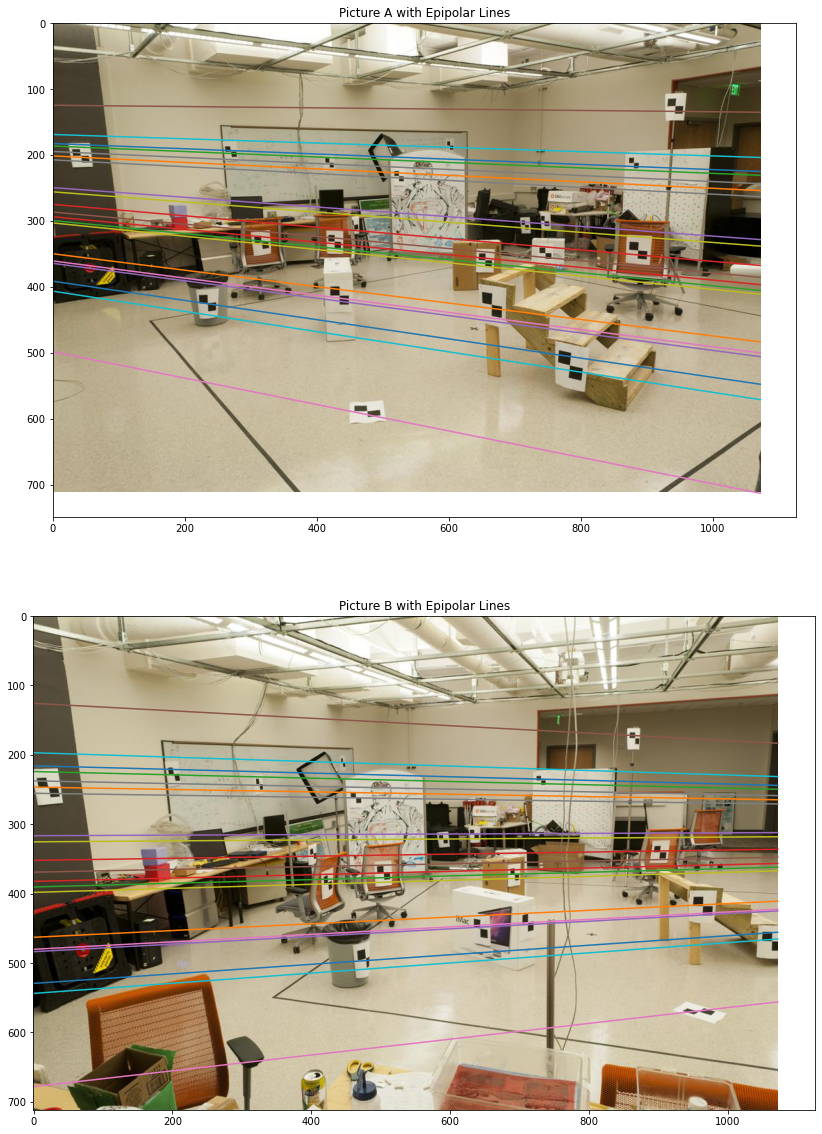

In [115]:
from PIL import Image
img_p_prime = Image.open('ps3/input/pic_a.jpg')
img_p = Image.open('ps3/input/pic_b.jpg')
epipolar_prime = np.zeros((20,3))
epipolar = np.zeros((20,3))

# Epipolar line equation ax+by+c=0 finding function for y = mx+b   
def lines(a, b, c):   
    mm = -a/b
    cc = -c/b
    return mm,cc

fig = plt.figure(figsize=(20,20))

# PICTURE A 
a = fig.add_subplot(2,1,1)
plt.imshow(img_p_prime)
a.set_title('Picture A with Epipolar Lines')
# Epipolar lines for picture A
for i in range(20):    
    line = np.dot(f,p_2d_ones[i,0:3])
    epipolar_prime[i][0:3]= line
# Line equation for picture A and plotting lines
for i in range(20):
    m_prime,c_prime = lines(epipolar_prime[i][0], epipolar_prime[i][1], epipolar_prime[i][2])
    x_prime = np.arange(0.0,1073.0)
    y_prime = m_prime * x_prime + c_prime 
    plt.plot(x_prime,y_prime)

# PICTURE B    
b = fig.add_subplot(2,1,2)
plt.imshow(img_p)
b.set_title('Picture B with Epipolar Lines')
# Epipolar lines for picture B
for i in range(20):    
    line = np.dot(np.transpose(f),p_2d_prime_ones[i,0:3])
    epipolar[i][0:3]= line  

# Line equation for B and plotting lines
for i in range(20):
    m,c = lines(epipolar[i][0], epipolar[i][1], epipolar[i][2])
    x = np.arange(0.0,1073.0)
    y = m * x + c
    plt.plot(x,y)